# Control System Requiriments

## Requisitos
O conjunto de requisitos foi selecionado por se tratar de um sistema de controle baseado em rodas de reação especificamente desenvolvido para um CubeSat de 6U. Esses requisitos estabelecem parâmetros essenciais para a operação do satélite, garantindo que o controle de atitude atenda às exigências de precisão, taxa de varredura, estabilidade e limitação dos atuadores, promovendo um desempenho eficiente da missão

Destacando as limitações dos atuadores, a precisão do apontamento do sistema de controle, a faixa e taxa de varredura, o desvio, o tempo de estabilização, o tempo de subida e o percentual de ultrapassagem.
Os dois primeiros requisitos são derivados e surgem quando uma roda de reação é selecionada para atuar o satélite, impondo restrições ao algoritmo de controle para evitar danos aos motores das rodas de reação:

- R01: A taxa de variação do comando da velocidade angular não deve exceder a aceleração angular máxima permitida da roda de reação.
- R02: A velocidade angular comandada não deve exceder a velocidade angular máxima permitida da roda de reação.

Os requisitos restantes descrevem o desempenho esperado do subsistema de controle de atitude no contexto de sua capacidade de controlar a orientação do CubeSat de 6U:

- R03: A precisão do apontamento deve ser de pelo menos 1 grau como limite mínimo e 0,08 graus como objetivo.
- R04: A faixa de apontamento no eixo Z deve ser de -180 a 180 graus.
- R05: A faixa de apontamento no eixo Y deve ser de -90 a 90 graus.
- R06: A faixa de apontamento no eixo X deve ser de -180 a 180 graus.
- R07: A taxa de varredura deve ser maior que 3 deg/s como limite mínimo e maior que 7 deg/s como objetivo
- R08: Após a estabilização, a taxa de desvio deve ser menor que 3 deg/min como limite mínimo e menor que 1 deg/min como objetivo.
- R09: Após a estabilização, o desvio total deve ser $\le$  $\pm$ 0,5 graus como limite mínimo e $\le$  $\pm$ 0,1 graus como objetivo.
- R10: O tempo de estabilização de 5\% deve ser $\le$  5 minutos como limite mínimo e $\le$ 2 minutos como objetivo.
- R11: O tempo de estabilização de 2\% deve ser $\le$  7 minutos como limite mínimo e $\le$ 3 minutos como objetivo.
- R12: O tempo de subida deve ser $\le$  5 minutos como limite mínimo e $\le$ 2 minutos como objetivo.
- R13: O percentual de ultrapassagem deve ser $\le$  50\% como limite mínimo e $\le$  25\% como objetivo.



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_9912\1181203241.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()  # Pode gerar erro sem elementos para legenda


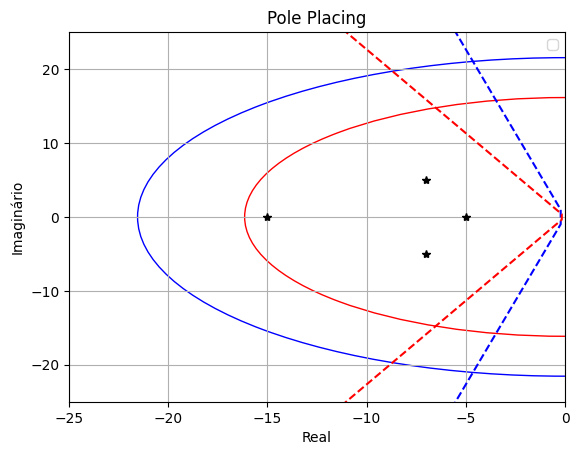

In [12]:
# Aqui se encontram os requisitos mínimos e recomendados para se encontrar uma área em um gráfico para alocação dos polos
import numpy as np

velo_varr_mini = 3 # deg/s
velo_varr_reco = 7 # deg/s
desv_regi_esta_mini = 3/60 # deg/s
desv_regi_esta_reco = 1/60 # deg/s
erro_regi_esta_mini = 0.5 # deg
erro_regi_esta_reco = 0.1 # deg
temp_esta_5_por_cent_mini = 5*60 # s
temp_esta_5_por_cent_reco = 2*60 # s
temp_esta_2_por_cent_mini = 7*60 # s
temp_esta_2_por_cent_reco = 3*60 # s
temp_subi_mini = 5*60 # s
temp_subi_reco = 2*60 # s
maxi_sobr_sina_mini = 0.5 
maxi_sobr_sina_reco = 0.25

# Requisitor Mínimos
sq_pi = np.pi**2
sq_ln_mp = np.log(maxi_sobr_sina_mini)**2
zeta_mini = np.sqrt(sq_ln_mp/(sq_ln_mp+sq_pi))
omega_n_mini_5_por_cent = temp_esta_5_por_cent_mini/3*zeta_mini
beta_mini_5_por_cent = np.atan2(omega_n_mini_5_por_cent*np.sqrt(1-zeta_mini**2),zeta_mini*omega_n_mini_5_por_cent)

# Requisitor Recomendados
sq_pi = np.pi**2
sq_ln_mp = np.log(maxi_sobr_sina_reco)**2
zeta_reco = np.sqrt(sq_ln_mp/(sq_ln_mp+sq_pi))
omega_n_reco_5_por_cent = temp_esta_5_por_cent_reco/3*zeta_reco
beta_reco_5_por_cent = np.atan2(omega_n_reco_5_por_cent*np.sqrt(1-zeta_reco**2),zeta_reco*omega_n_reco_5_por_cent) 

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title('Pole Placing')

circle_5_mini = plt.Circle((0, 0), omega_n_mini_5_por_cent, color='b', fill=False)
ax.add_patch(circle_5_mini)
x_vals = np.linspace(-omega_n_mini_5_por_cent, omega_n_mini_5_por_cent, 100)
y_vals = np.tan(beta_mini_5_por_cent) * x_vals
ax.plot(-abs(x_vals), y_vals, color='b', linestyle='--',)

circle_5_reco = plt.Circle((0, 0), omega_n_reco_5_por_cent, color='r', fill=False)
ax.add_patch(circle_5_reco)
x_vals = np.linspace(-omega_n_reco_5_por_cent, omega_n_reco_5_por_cent, 100)
y_vals = np.tan(beta_reco_5_por_cent) * x_vals
ax.plot(-abs(x_vals), y_vals, color='r', linestyle='--',)


# Configurar os rótulos dos eixos
ax.set_xlabel(r"Real")

ax.set_ylabel(r"Imaginário")
# Configurar a grade e proporções iguais
ax.set_xlim([-25, 0])
ax.set_ylim([-25, 25])
ax.grid(True)
ax.legend()  # Pode gerar erro sem elementos para legenda


P1 = -7+5j 
P2 = -7-5j
P3 = -15+0.j
P4 = -5+0.j
ax.plot(P1.real, P1.imag, '*k')
ax.plot(P2.real, P2.imag, '*k')
ax.plot(P3.real, P3.imag, '*k')
ax.plot(P4.real, P4.imag, '*k')

# Exibir o gráfico
plt.show()